# MADHYA PARDESH

In [342]:
import pandas as pd

# Load the datasets for Madhya Pradesh
df_mp_enrolment = pd.read_csv('/content/Madhya Pradesh Enrolment State.csv')
df_mp_demographic = pd.read_csv('/content/Madhya Pradesh Demographic State.csv')
df_mp_biometric = pd.read_csv('/content/Madhya Pradesh Biometric State.csv')

print("Madhya Pradesh Enrolment Dataset:")
print(df_mp_enrolment.head())
print(df_mp_enrolment.info())
print(df_mp_enrolment.describe())

print("\nMadhya Pradesh Demographic Dataset:")
print(df_mp_demographic.head())
print(df_mp_demographic.info())
print(df_mp_demographic.describe())

print("\nMadhya Pradesh Biometric Dataset:")
print(df_mp_biometric.head())
print(df_mp_biometric.info())
print(df_mp_biometric.describe())

Madhya Pradesh Enrolment Dataset:
         date           state     district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Madhya Pradesh   Agar Malwa   465447        3         0   
1  01-09-2025  Madhya Pradesh    Alirajpur   457888        7        11   
2  01-09-2025  Madhya Pradesh      Anuppur   484113        1         0   
3  01-09-2025  Madhya Pradesh      Anuppur   484440        1         0   
4  01-09-2025  Madhya Pradesh  Ashok Nagar   473330       19         4   

   age_18_greater  
0               0  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59991 entries, 0 to 59990
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            59991 non-null  object
 1   state           59991 non-null  object
 2   district        59991 non-null  object
 3   pincode         59991 non-null  int64 
 4   age_0_5         59991 no

In [343]:
df_mp_enrolment['date'] = pd.to_datetime(df_mp_enrolment['date'], format='%d-%m-%Y')
df_mp_demographic['date'] = pd.to_datetime(df_mp_demographic['date'], format='%d-%m-%Y')
df_mp_biometric['date'] = pd.to_datetime(df_mp_biometric['date'], format='%d-%m-%Y')

merged_mp_df_temp = pd.merge(df_mp_enrolment, df_mp_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_mp_merged = pd.merge(merged_mp_df_temp, df_mp_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_mp_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_mp_merged[numeric_cols] = df_mp_merged[numeric_cols].fillna(0)

In [344]:
print("Data types after conversion for df_mp_enrolment:")
print(df_mp_enrolment.info())
print("\nData types after conversion for df_mp_demographic:")
print(df_mp_demographic.info())
print("\nData types after conversion for df_mp_biometric:")
print(df_mp_biometric.info())

Data types after conversion for df_mp_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59991 entries, 0 to 59990
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            59991 non-null  datetime64[ns]
 1   state           59991 non-null  object        
 2   district        59991 non-null  object        
 3   pincode         59991 non-null  int64         
 4   age_0_5         59991 non-null  int64         
 5   age_5_17        59991 non-null  int64         
 6   age_18_greater  59991 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.2+ MB
None

Data types after conversion for df_mp_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85897 entries, 0 to 85896
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           85897 non-null  dat

In [345]:
print("\nMerged Madhya Pradesh DataFrame (df_mp_merged) head:")
print(df_mp_merged.head())
print("\nMerged Madhya Pradesh DataFrame (df_mp_merged) info:")
print(df_mp_merged.info())
print("\nMerged Madhya Pradesh DataFrame (df_mp_merged) describe:")
print(df_mp_merged.describe())


Merged Madhya Pradesh DataFrame (df_mp_merged) head:
        date           state    district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Madhya Pradesh  Agar Malwa   465230      0.0       0.0   
1 2025-03-01  Madhya Pradesh  Agar Malwa   465441      0.0       0.0   
2 2025-03-01  Madhya Pradesh  Agar Malwa   465447      0.0       0.0   
3 2025-03-01  Madhya Pradesh  Agar Malwa   465449      0.0       0.0   
4 2025-03-01  Madhya Pradesh  Agar Malwa   465550      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           13.0         174.0          44.0         70.0  
1             0.0           44.0         361.0           0.0          0.0  
2             0.0           30.0         343.0         132.0        244.0  
3             0.0           34.0         349.0           0.0          0.0  
4             0.0           14.0         119.0          69.0         77.0  

Merged Madhya Pradesh DataFrame (df_mp_merged) info:
<cl

In [346]:
import numpy as np

df_mp = df_mp_merged[df_mp_merged['state'] == 'Madhya Pradesh'].copy()
df_mp['year'] = df_mp['date'].dt.year
df_mp['month'] = df_mp['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_mp_agg = df_mp.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

# 1. Create 'totalenrolments' column
df_mp_agg['totalenrolments'] = df_mp_agg['age_0_5'] + df_mp_agg['age_5_17'] + df_mp_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_mp_agg['childenrolments'] = df_mp_agg['age_0_5'] + df_mp_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_mp_agg['totaldemoupdates'] = df_mp_agg['demo_age_5_17'] + df_mp_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_mp_agg['totalbioupdates'] = df_mp_agg['bio_age_5_17'] + df_mp_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_mp_agg['CES'] = np.where(
    df_mp_agg['totalenrolments'] == 0,
    0,
    df_mp_agg['childenrolments'] / df_mp_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_mp_agg['DUR'] = np.where(
    df_mp_agg['totalenrolments'] == 0,
    0,
    df_mp_agg['totaldemoupdates'] / df_mp_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_mp_agg['BUR'] = np.where(
    df_mp_agg['totalenrolments'] == 0,
    0,
    df_mp_agg['totalbioupdates'] / df_mp_agg['totalenrolments']
)

In [347]:
print("Shape of df_mp:", df_mp.shape)
print("\nFirst 5 rows of df_mp with new 'year' and 'month' columns:")
print(df_mp.head())
print("\nAggregated DataFrame (df_mp_agg) head:")
print(df_mp_agg.head())
print("\nAggregated DataFrame (df_mp_agg) info:")
print(df_mp_agg.info())
print("\nAggregated DataFrame (df_mp_agg) describe:")
print(df_mp_agg.describe())

Shape of df_mp: (240100, 13)

First 5 rows of df_mp with new 'year' and 'month' columns:
        date           state    district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Madhya Pradesh  Agar Malwa   465230      0.0       0.0   
1 2025-03-01  Madhya Pradesh  Agar Malwa   465441      0.0       0.0   
2 2025-03-01  Madhya Pradesh  Agar Malwa   465447      0.0       0.0   
3 2025-03-01  Madhya Pradesh  Agar Malwa   465449      0.0       0.0   
4 2025-03-01  Madhya Pradesh  Agar Malwa   465550      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0           13.0         174.0          44.0         70.0   
1             0.0           44.0         361.0           0.0          0.0   
2             0.0           30.0         343.0         132.0        244.0   
3             0.0           34.0         349.0           0.0          0.0   
4             0.0           14.0         119.0          69.0         77.0   

   year  month 

In [348]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_mp_agg['Enorm'] = df_mp_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_mp_agg['Dnorm'] = df_mp_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_mp_agg['Bnorm'] = df_mp_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_mp_agg['stdnorm'] = (df_mp_agg['Enorm'] + df_mp_agg['Dnorm'] + df_mp_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_mp_agg['ALBI'] = 1 - df_mp_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_mp_agg['ALBI'] = df_mp_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_mp_agg) with normalized metrics and ALBI head:")
print(df_mp_agg.head())

Aggregated DataFrame (df_mp_agg) with normalized metrics and ALBI head:
   year  month           state     district  age_0_5  age_5_17  \
0  2025      3  Madhya Pradesh   Agar Malwa      0.0       0.0   
1  2025      3  Madhya Pradesh    Alirajpur      0.0       0.0   
2  2025      3  Madhya Pradesh      Anuppur      0.0       0.0   
3  2025      3  Madhya Pradesh  Ashok Nagar      0.0       0.0   
4  2025      3  Madhya Pradesh     Balaghat      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...  \
0             0.0          135.0        1346.0         245.0  ...   
1             0.0          504.0        6836.0          40.0  ...   
2             0.0          212.0        2681.0         545.0  ...   
3             0.0          564.0        6194.0         329.0  ...   
4             0.0         2497.0       14969.0         984.0  ...   

   totaldemoupdates  totalbioupdates  CES  DUR  BUR  Enorm     Dnorm  \
0            1481.0            636.0  0.0  0

In [349]:
df_mp_agg['Enormrisk'] = 1 - df_mp_agg['Enorm']
df_mp_agg['CESrisknorm'] = 1 - df_mp_agg['CES']
df_mp_agg['DURrisknorm'] = 1 - df_mp_agg['DUR']
df_mp_agg['BURrisknorm'] = 1 - df_mp_agg['BUR']
df_mp_agg['ALBIrisknorm'] = 1 - df_mp_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_mp_agg['riskscore'] = (
    df_mp_agg['Enormrisk'] +
    df_mp_agg['CESrisknorm'] +
    df_mp_agg['DURrisknorm'] +
    df_mp_agg['BURrisknorm'] +
    df_mp_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_mp_agg) with risk components and riskscore head:")
print(df_mp_agg.head())

Aggregated DataFrame (df_mp_agg) with risk components and riskscore head:
   year  month           state     district  age_0_5  age_5_17  \
0  2025      3  Madhya Pradesh   Agar Malwa      0.0       0.0   
1  2025      3  Madhya Pradesh    Alirajpur      0.0       0.0   
2  2025      3  Madhya Pradesh      Anuppur      0.0       0.0   
3  2025      3  Madhya Pradesh  Ashok Nagar      0.0       0.0   
4  2025      3  Madhya Pradesh     Balaghat      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm  \
0             0.0          135.0        1346.0         245.0  ...  0.048302   
1             0.0          504.0        6836.0          40.0  ...  0.239392   
2             0.0          212.0        2681.0         545.0  ...  0.094354   
3             0.0          564.0        6194.0         329.0  ...  0.220410   
4             0.0         2497.0       14969.0         984.0  ...  0.569649   

      Bnorm   stdnorm      ALBI  Enormrisk  CESrisknor

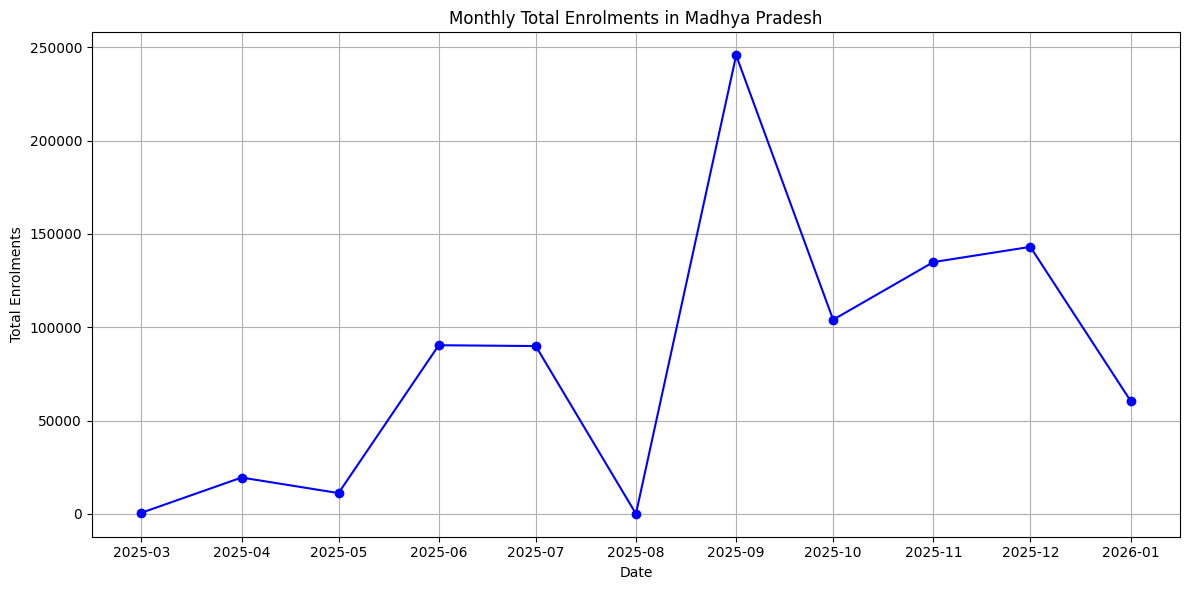

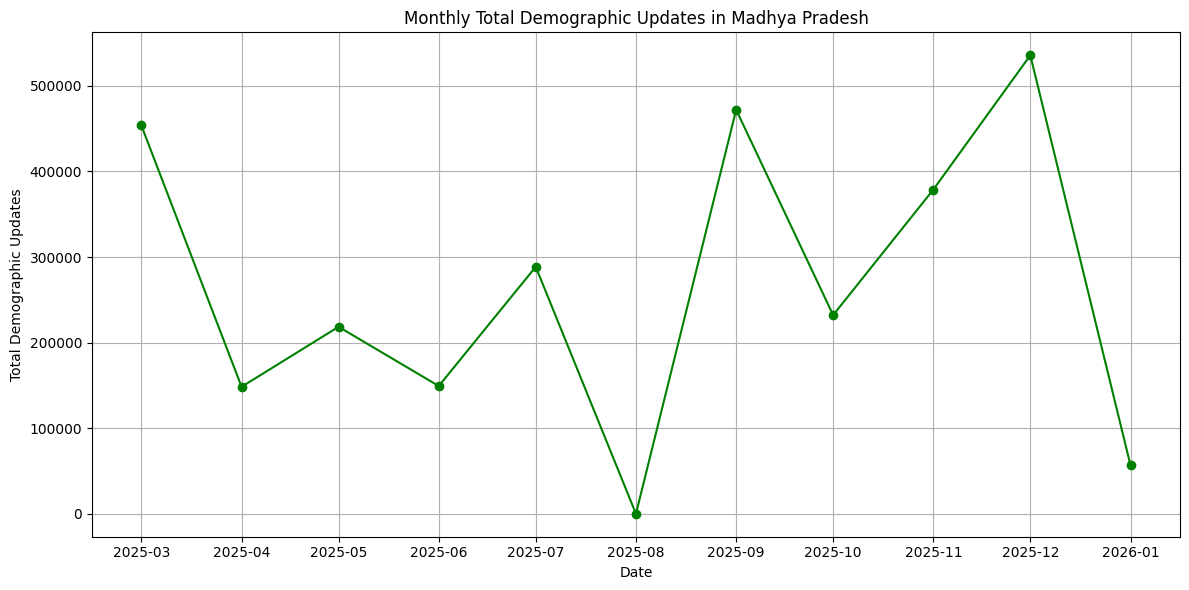

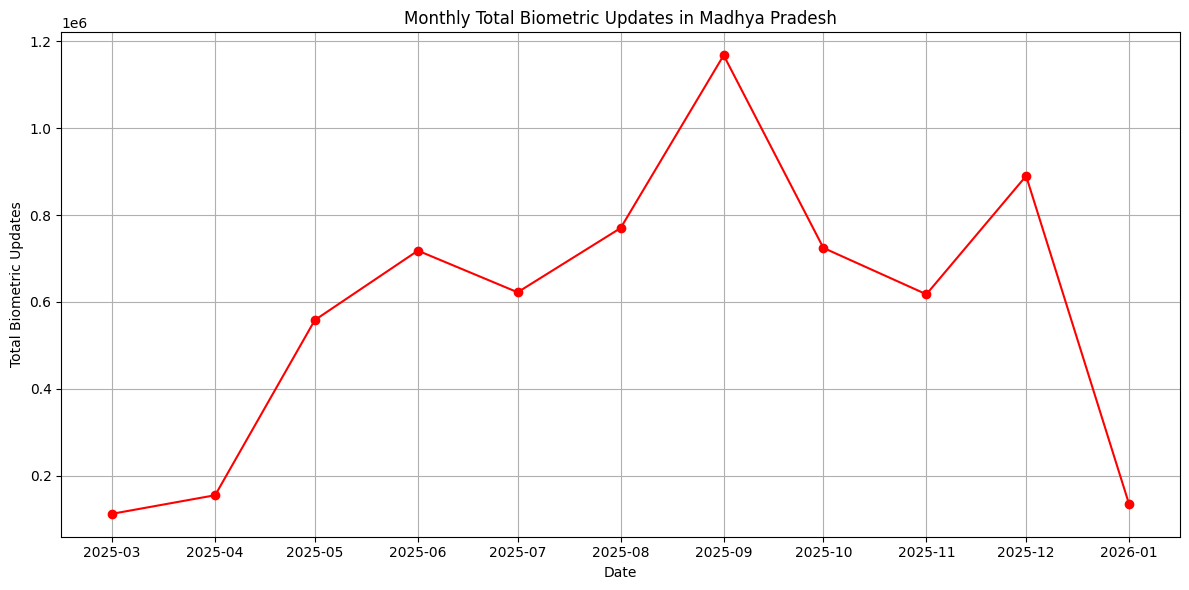

Monthly trend plots generated successfully.


In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

df_mp_monthly_trends = df_mp_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_mp_monthly_trends['date'] = pd.to_datetime(df_mp_monthly_trends['year'].astype(str) + '-' + df_mp_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_mp_monthly_trends = df_mp_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mp_monthly_trends['date'], df_mp_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Madhya Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mp_monthly_trends['date'], df_mp_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Madhya Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mp_monthly_trends['date'], df_mp_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Madhya Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

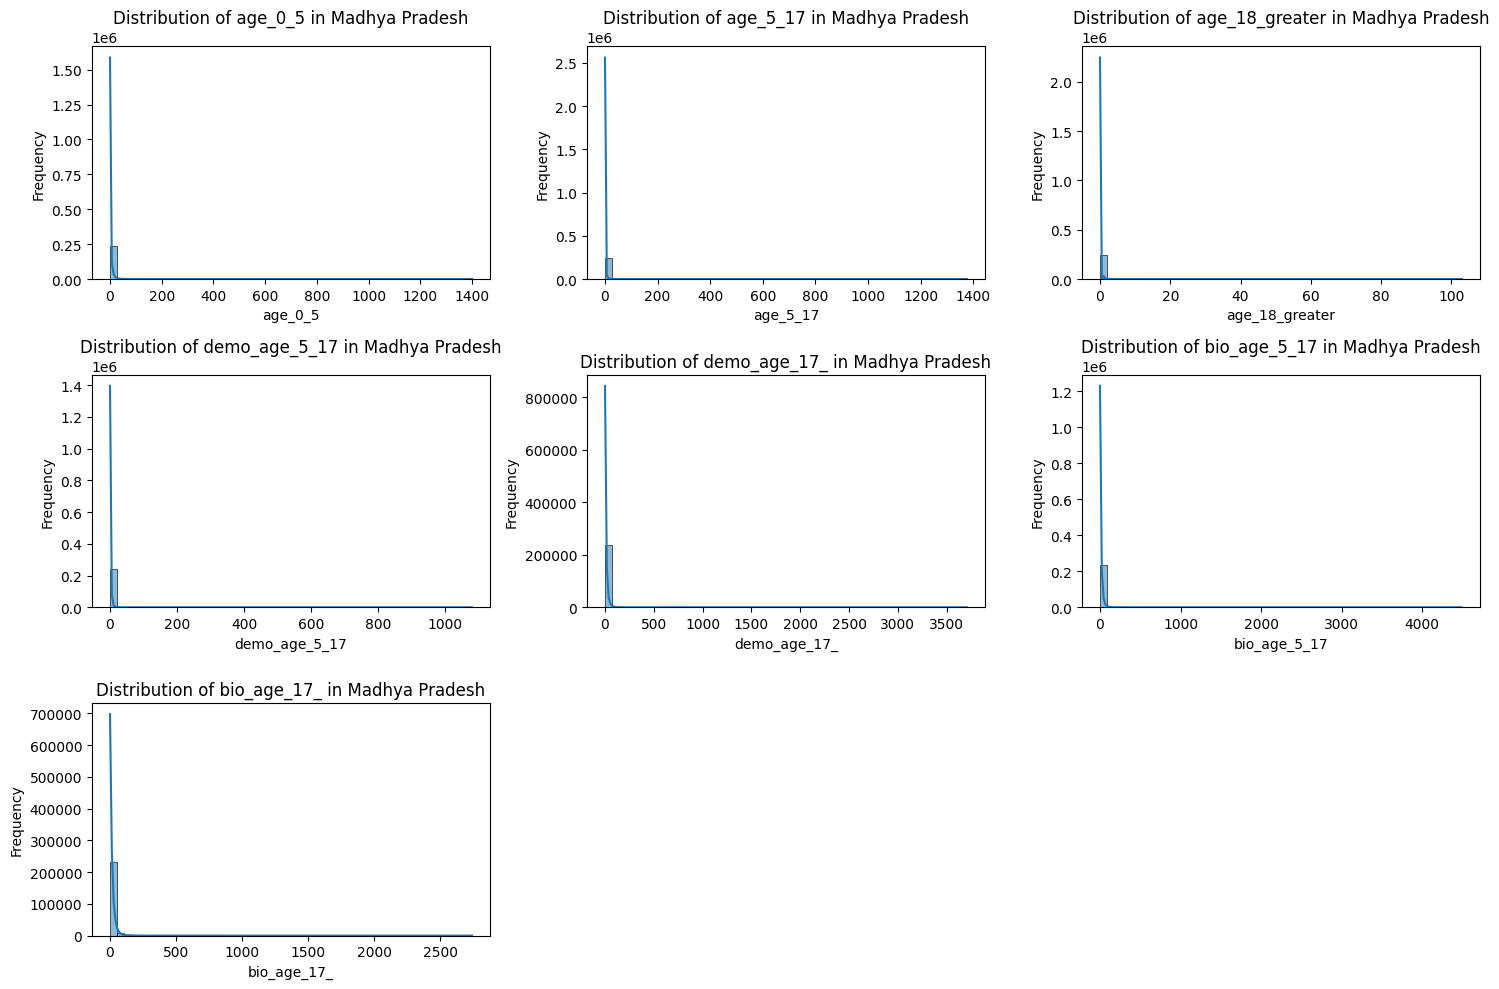

Histograms for numerical age-related columns displayed for Madhya Pradesh.


In [351]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_mp_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Madhya Pradesh')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical age-related columns displayed for Madhya Pradesh.")

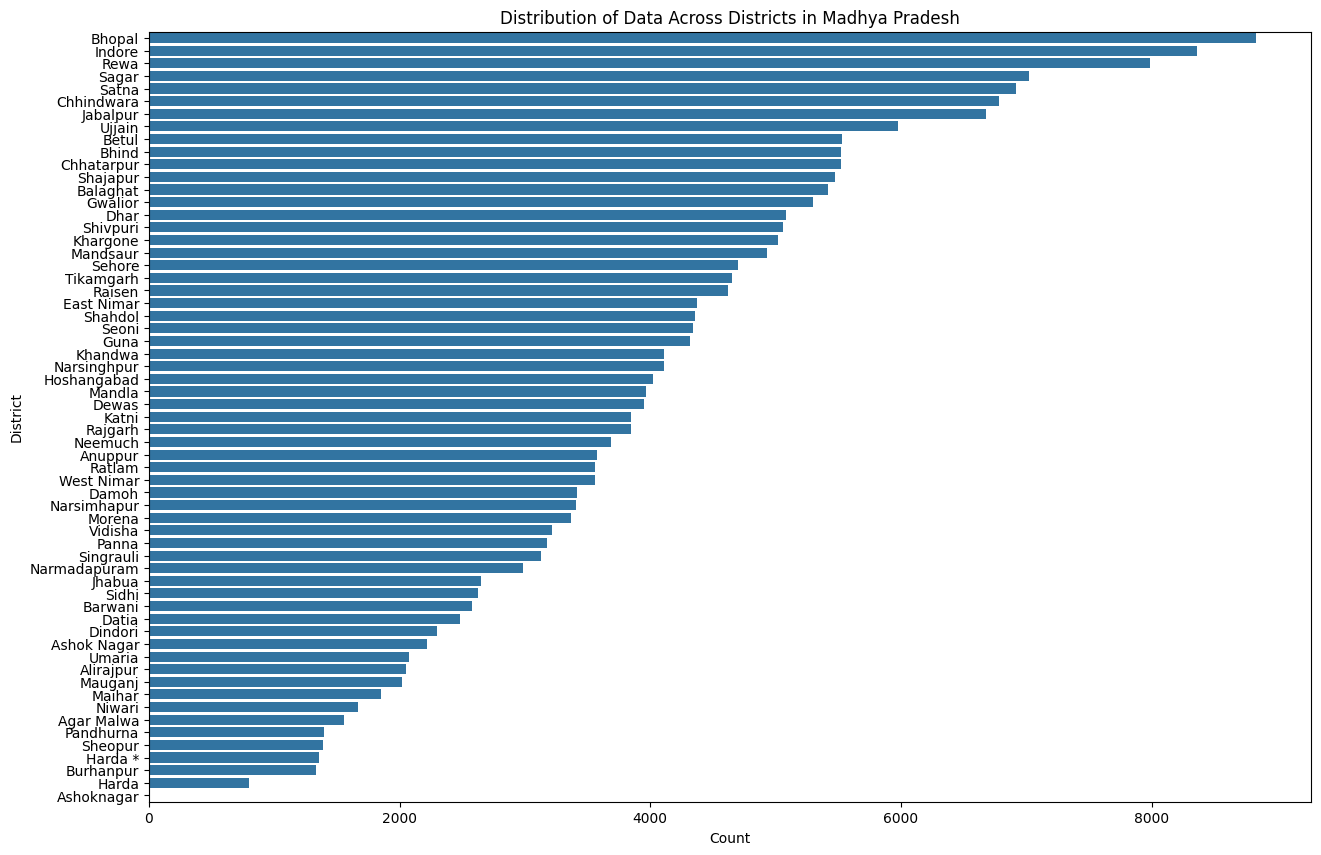

Count plot for 'district' displayed for Madhya Pradesh.


In [352]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.countplot(data=df_mp_merged, y='district', order=df_mp_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Madhya Pradesh')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed for Madhya Pradesh.")

**Bivariate and Trivariate Analysis**

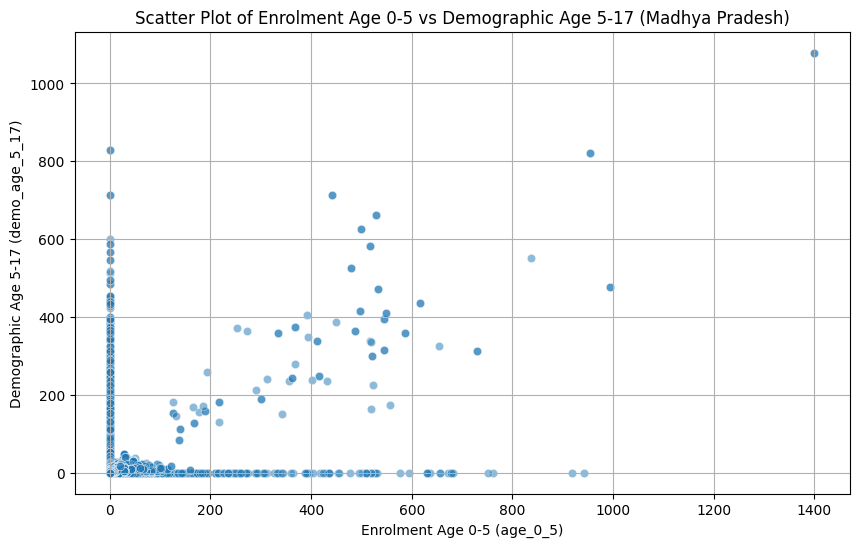

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Madhya Pradesh.


In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mp_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Madhya Pradesh)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Madhya Pradesh.")

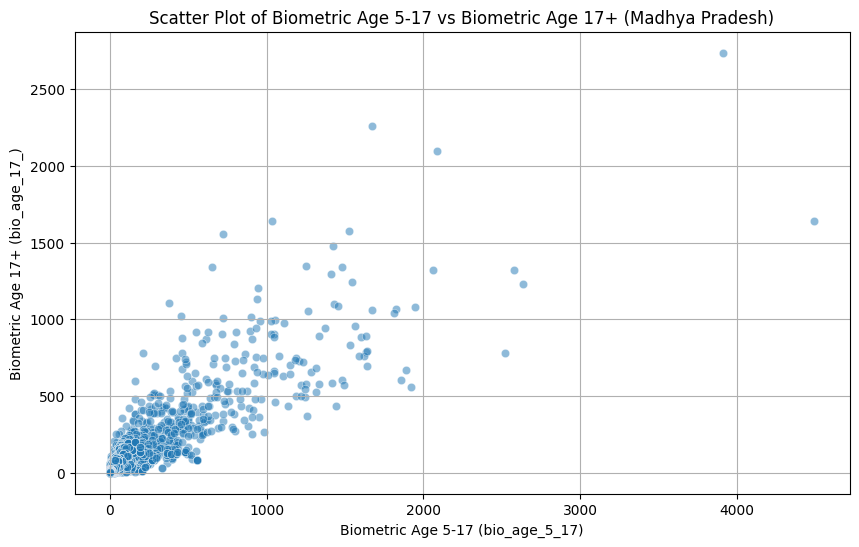

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Madhya Pradesh.


In [354]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mp_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Madhya Pradesh)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Madhya Pradesh.")

In [355]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_mp = df_mp_merged[numerical_age_cols].corr()

print("Correlation Matrix for Madhya Pradesh:")
print(correlation_matrix_mp)

Correlation Matrix for Madhya Pradesh:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.828376        0.654249       0.361866   
age_5_17        0.828376  1.000000        0.701551       0.337556   
age_18_greater  0.654249  0.701551        1.000000       0.250324   
demo_age_5_17   0.361866  0.337556        0.250324       1.000000   
demo_age_17_    0.326936  0.279185        0.217277       0.907682   
bio_age_5_17    0.116049  0.069314        0.064048       0.191979   
bio_age_17_     0.138475  0.074281        0.063130       0.191582   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.326936      0.116049     0.138475  
age_5_17            0.279185      0.069314     0.074281  
age_18_greater      0.217277      0.064048     0.063130  
demo_age_5_17       0.907682      0.191979     0.191582  
demo_age_17_        1.000000      0.228312     0.238442  
bio_age_5_17        0.228312      1.000000     0.850816  
bi

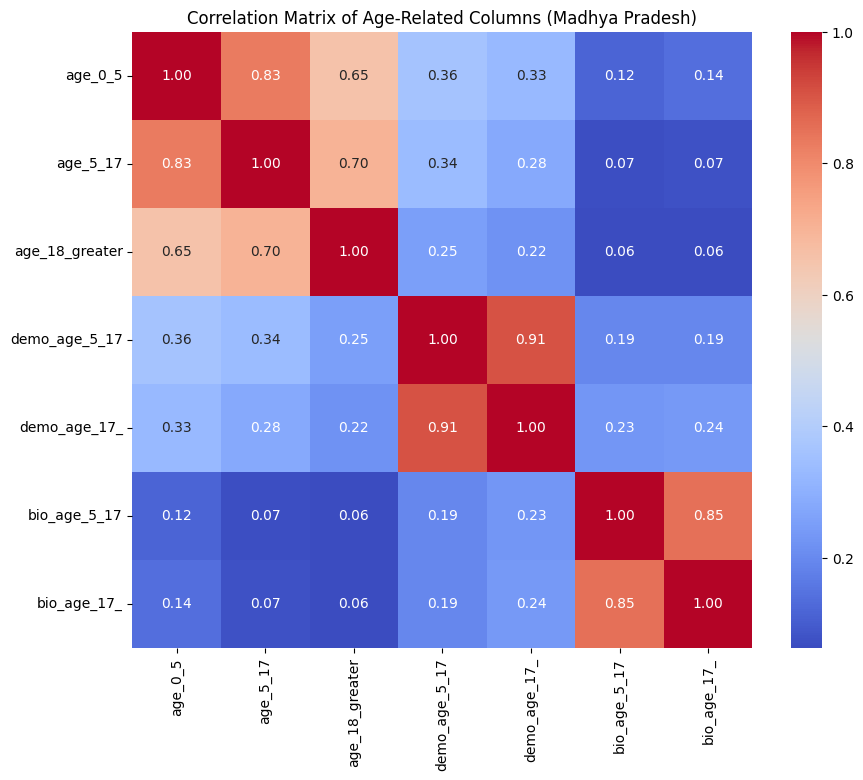

Correlation matrix heatmap for age-related columns displayed for Madhya Pradesh.


In [356]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_mp, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Madhya Pradesh)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Madhya Pradesh.")

In [357]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_district_mean = df_mp_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data:")
print(df_district_mean.head())
print(df_district_mean.info())

df_district_mean['total_avg_age'] = df_district_mean[age_cols_to_group].sum(axis=1)

print("\nDistrict-wise average age-related data with total average age:")
print(df_district_mean.head())
print(df_district_mean.info())


District-wise average age-related data:
      district     age_0_5    age_5_17  age_18_greater  demo_age_5_17  \
0   Agar Malwa    2.363053    0.685696        0.028223       0.673509   
1    Alirajpur    2.778537    3.005854        0.295610       1.254146   
2      Anuppur    1.394803    0.212629        0.003912       1.072646   
3  Ashok Nagar    3.073390    1.295362        0.124268       2.502026   
4   Ashoknagar  318.800000  264.600000       18.800000       0.000000   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      6.397691      3.491341     9.619628  
1     11.898049     17.741951    17.743902  
2      6.372450      7.592065    12.249232  
3     17.224223     18.924809    18.515083  
4      0.000000      0.000000     0.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        61 non-null     object 
 1   age_0_5  

In [358]:
df_district_mean_top10 = df_district_mean.nlargest(10, 'total_avg_age')

print("\nTop 10 districts by total average age-related counts:")
print(df_district_mean_top10[['district', 'total_avg_age']])


Top 10 districts by total average age-related counts:
      district  total_avg_age
4   Ashoknagar     602.200000
6      Barwani      96.387961
34      Morena      87.682115
10   Burhanpur      79.856929
52     Sheopur      75.767626
44      Ratlam      70.177659
59     Vidisha      67.640012
21       Harda      67.469925
54       Sidhi      66.897104
26      Jhabua      62.603318


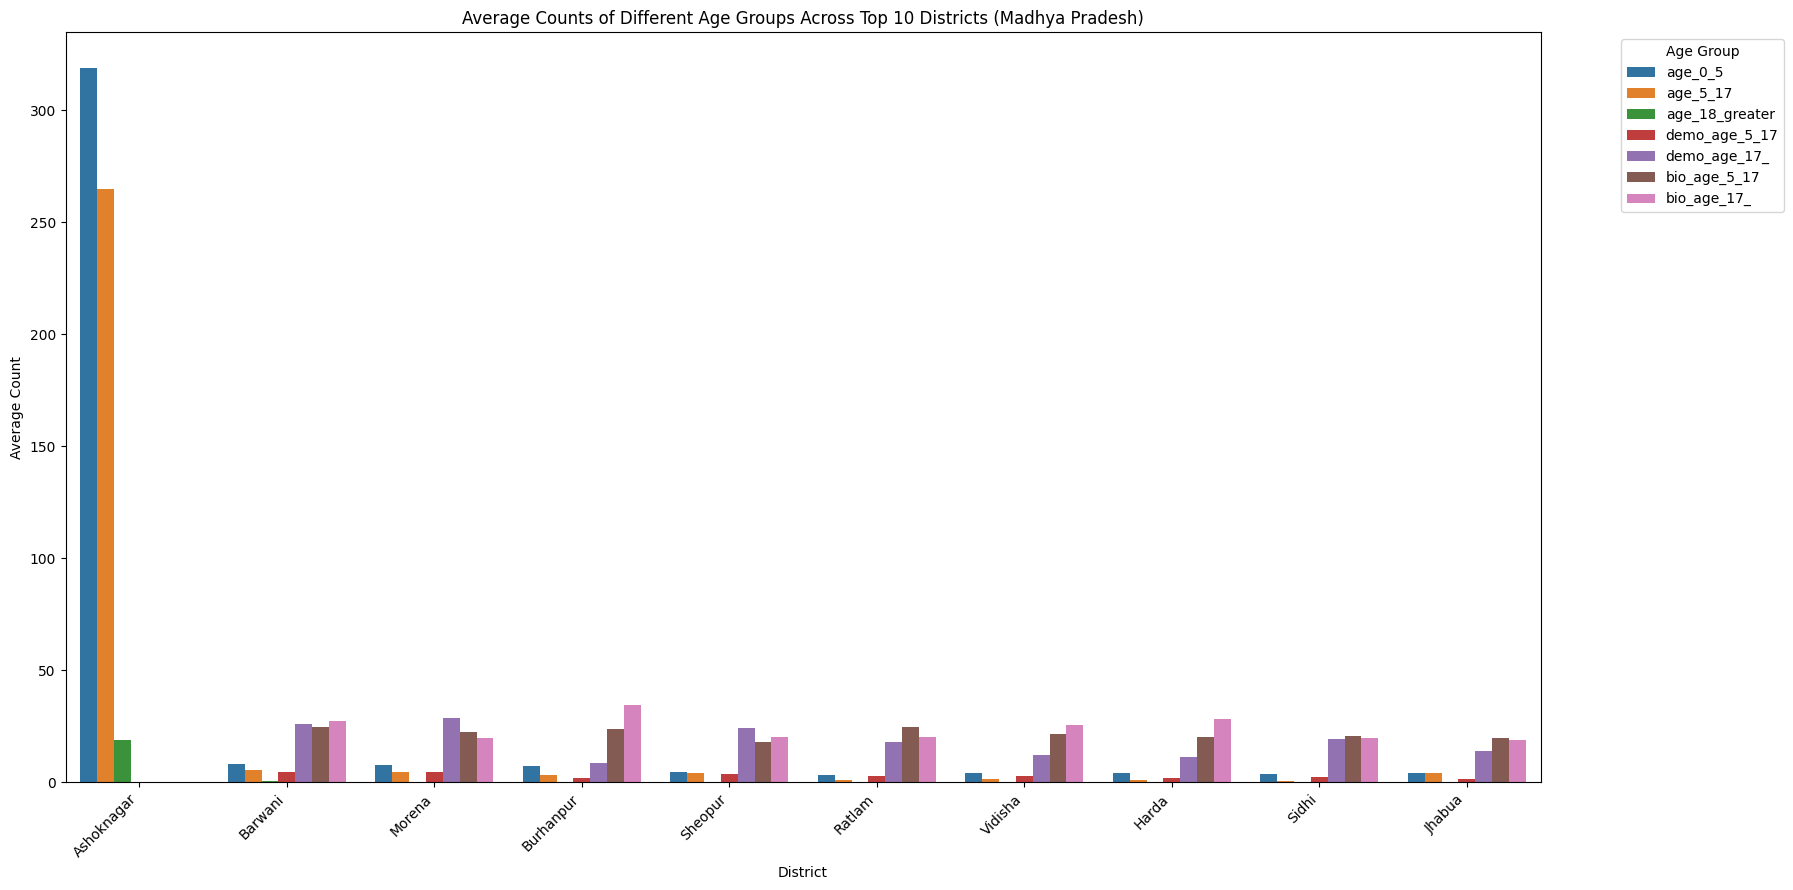

Grouped bar chart for average age-related counts across top 10 districts displayed for Madhya Pradesh.


In [359]:
df_district_mean_melted = df_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Madhya Pradesh)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Grouped bar chart for average age-related counts across top 10 districts displayed for Madhya Pradesh.")

Time-series aggregated data (sum of age-related columns per date) for Madhya Pradesh:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        50258.0      403390.0   
1 2025-03-09    132.0      74.0            36.0            0.0           0.0   
2 2025-03-20     73.0      25.0            18.0            0.0           0.0   
3 2025-03-23     10.0      21.0            16.0            0.0           0.0   
4 2025-03-27     71.0      41.0            25.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0       51258.0      60929.0  
1           0.0          0.0  
2           0.0          0.0  
3           0.0          0.0  
4           0.0          0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            235 non-null    da

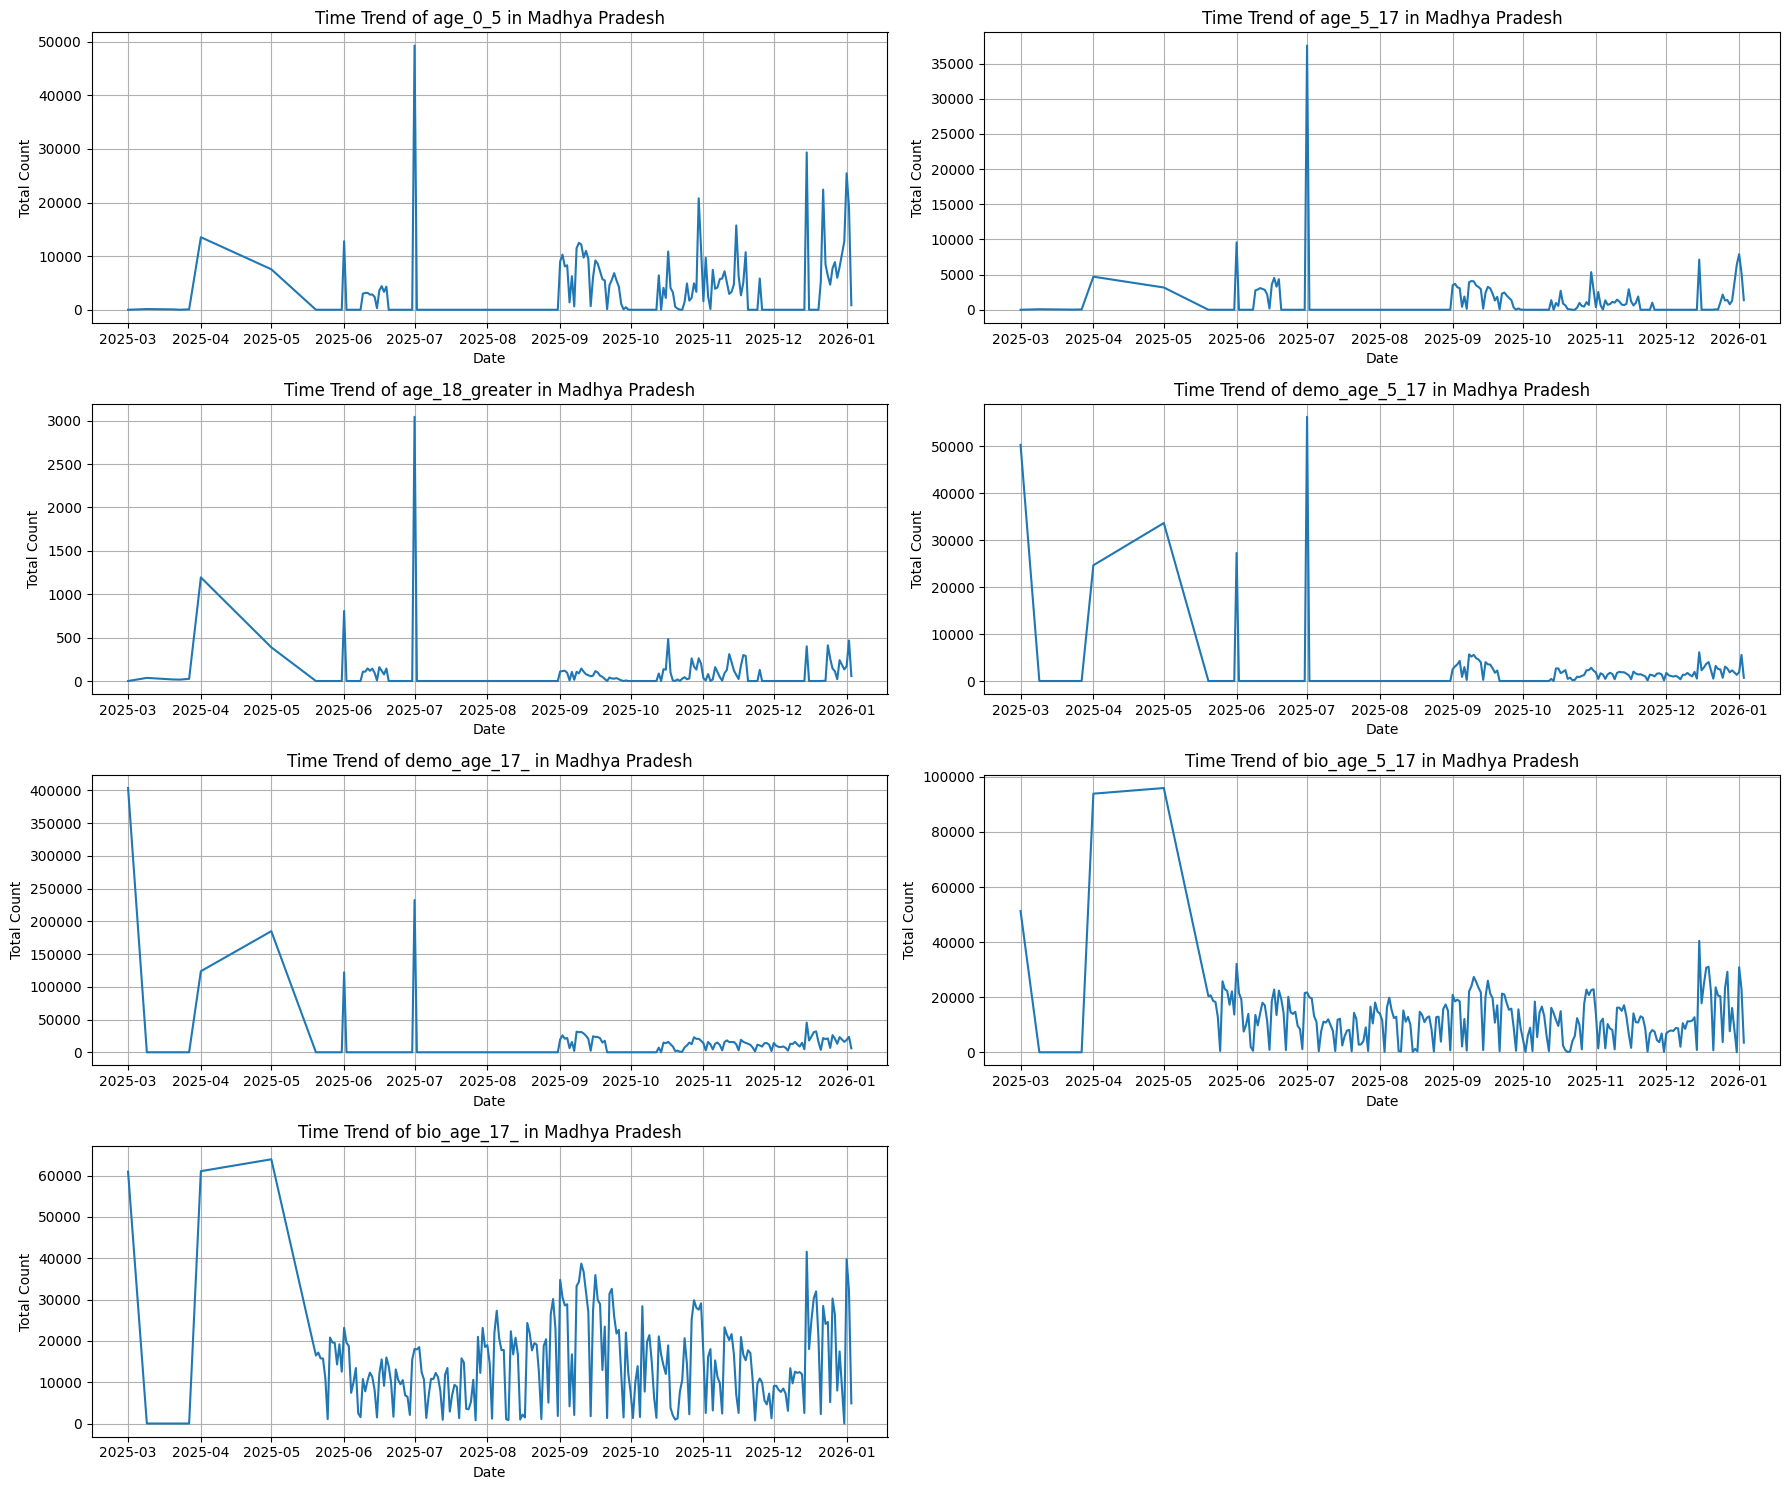

Insight: Line charts for each age-related column over time in Madhya Pradesh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [360]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a list named `age_cols_to_group` containing the age-related column names
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# 2. Group the `df_mp_merged` DataFrame by the 'date' column and sum the columns specified in `age_cols_to_group`. Reset the index of the resulting DataFrame and store it in `df_time_trend`.
df_time_trend = df_mp_merged.groupby('date')[age_cols_to_group].sum().reset_index()

# 3. Print the head and info of the `df_time_trend` DataFrame to inspect the aggregated data.
print("Time-series aggregated data (sum of age-related columns per date) for Madhya Pradesh:")
print(df_time_trend.head())
print(df_time_trend.info())

# 4. Create a figure with a suitable size (e.g., 18x15 inches) to accommodate multiple plots.
plt.figure(figsize=(18, 15))

# 5. Iterate through each column in `age_cols_to_group`. In each iteration, create a subplot within the figure and generate a line plot using `seaborn.lineplot()`.
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_time_trend, x='date', y=col)
    # 6. Set the title of each subplot to indicate the time trend of the respective column.
    plt.title(f'Time Trend of {col} in Madhya Pradesh')
    # Label the x-axis as 'Date' and the y-axis as 'Total Count'. Add a grid to each plot for better readability.
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)

# 7. Use `plt.tight_layout()` to ensure proper spacing between subplots and display the plot using `plt.show()`.
plt.tight_layout()
plt.show()

# 8. Provide an insight summarizing the observed temporal trends across the plots
print("Insight: Line charts for each age-related column over time in Madhya Pradesh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

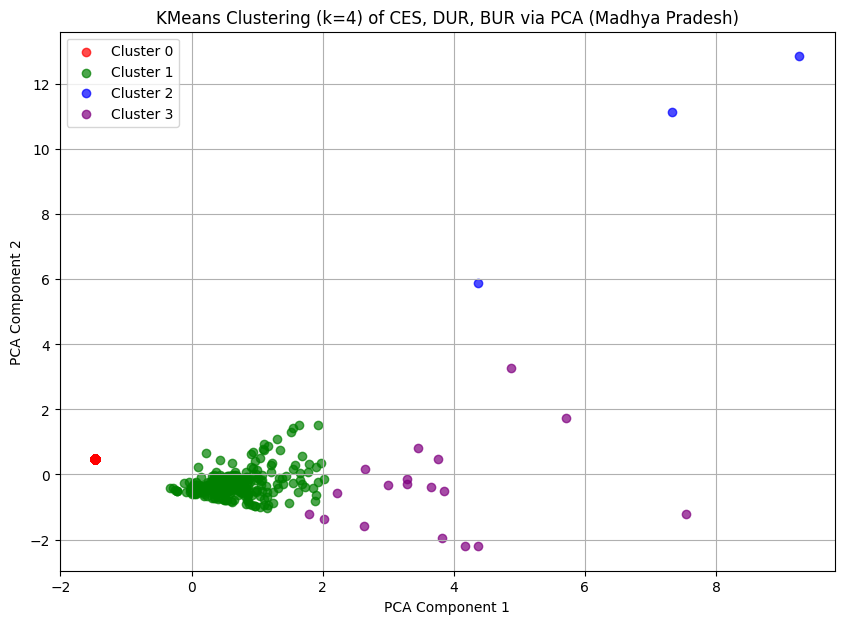

First 5 rows of df_mp_agg with 'clusterlabel' column:
   year  month           state     district  age_0_5  age_5_17  \
0  2025      3  Madhya Pradesh   Agar Malwa      0.0       0.0   
1  2025      3  Madhya Pradesh    Alirajpur      0.0       0.0   
2  2025      3  Madhya Pradesh      Anuppur      0.0       0.0   
3  2025      3  Madhya Pradesh  Ashok Nagar      0.0       0.0   
4  2025      3  Madhya Pradesh     Balaghat      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm  \
0             0.0          135.0        1346.0         245.0  ...  0.012944   
1             0.0          504.0        6836.0          40.0  ...  0.003236   
2             0.0          212.0        2681.0         545.0  ...  0.031850   
3             0.0          564.0        6194.0         329.0  ...  0.011234   
4             0.0         2497.0       14969.0         984.0  ...  0.052731   

    stdnorm      ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURrisknorm  \

In [361]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_mp_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_mp_agg
df_mp_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_mp_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Madhya Pradesh)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_mp_agg with 'clusterlabel' column:")
print(df_mp_agg.head())

In [362]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_mp_agg['year'].max()
latest_month = df_mp_agg[df_mp_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_mp_agg for the latest year and month
df_latest_month = df_mp_agg[(df_mp_agg['year'] == latest_year) & (df_mp_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
    district  CES
     Anuppur  1.0
  Chhindwara  1.0
     Dindori  1.0
       Datia  1.0
       Harda  1.0
     Harda *  1.0
 Hoshangabad  1.0
     Khandwa  1.0
     Mauganj  1.0
Narmadapuram  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
 district      CES
    Satna 0.899201
   Maihar 0.949367
    Seoni 0.956618
    Betul 0.968459
  Gwalior 0.970459
  Rajgarh 0.973950
 Mandsaur 0.975806
    Sagar 0.980793
   Morena 0.981405
Alirajpur 0.982063

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
    district      DUR
   Pandhurna 4.400000
     Mauganj 2.129630
      Maihar 1.772152
       Datia 1.626994
      Niwari 1.600000
Narmadapuram 1.594937
      Indore 1.441938
   Singrauli 1.354707
        Dhar 1.248411
        Rewa 1.212236

Bottom 10 Districts by DUR (Year 2026, Month 1):
   district      DUR
    Harda * 0.406250
      Harda 0.510721
  Burhan

## Summary (Madhya Pradesh):

The Aadhaar lifecycle analysis for Madhya Pradesh provides a detailed view of enrolment and update activities across its districts. The `df_mp_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_mp_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0. The `df_mp_merged` DataFrame has 240,100 entries and 11 columns, including date, state, district, pincode, and age-related counts.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero. These calculations are crucial for understanding enrolment patterns and update efficacy.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1 to ensure a consistent scale.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability within the expected range of 0-100.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles across Madhya Pradesh. These trends provide insights into the operational dynamics over time.

6.  **Univariate and Bivariate Analysis**: Histograms showed the distributions of various age-related counts and derived metrics. Scatter plots illustrated relationships like `age_0_5` vs `demo_age_5_17` and `bio_age_5_17` vs `bio_age_17_`, revealing weak positive correlations in some cases and stronger ones within similar data types (e.g., biometric age groups). The correlation matrix further confirmed these relationships, showing strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources. Count plots showed the distribution of data across districts.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Several districts (Anuppur, Chhindwara, Dindori, Datia, Harda, Hoshangabad, Khandwa, Mauganj, Narmadapuram) achieved a perfect CES of 1.0. Satna (0.899) and Maihar (0.949) had the lowest CES, indicating a lower proportion of child enrolments relative to total enrolments.
    *   **DUR (Demographic Update Rate)**: Pandhurna (4.40) and Mauganj (2.13) showed the highest DUR. Harda* (0.406) and Harda (0.511) had the lowest DURs, suggesting less frequent demographic updates relative to enrolments.
    *   **BUR (Biometric Update Rate)**: Harda* (3.875) and Bhopal (3.516) showed the highest BURs. Maihar (0.456) and Mauganj (0.685) were among the lowest, indicating less frequent biometric updates relative to enrolments.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Pandhurna (0.999) and Niwari (0.998) exhibited the best balance. Indore (0.0) and Dhar (0.412) had the lowest balance, suggesting imbalances in their Aadhaar lifecycle activities.
    *   **Risk Score**: Agar Malwa (22.47) and Maihar (16.34) showed the highest positive risk scores. Consistent with other states, many districts, such as Pandhurna (-61.97) and Bhopal (-33.29), displayed negative risk scores, reinforcing the need to re-evaluate this metric's calculation.

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into four distinct clusters based on their CES, DUR, and BUR metrics. The PCA visualization revealed these clusters spatially, providing insights into different operational profiles and performance levels across Madhya Pradesh's districts.

### Insights or Next Steps:

*   **Risk Score Refinement**: The persistent issue of negative `riskscore` values across multiple districts highlights a critical need to review and potentially recalculate this metric. A well-defined risk score should ideally be bounded between 0 and 100, providing clear and actionable insights for prioritizing interventions.
*   **Investigate Low Update Rates**: Districts with consistently low DUR and BUR, such as Harda* and Harda for DUR, and Maihar and Mauganj for BUR, should be targeted for further investigation to understand the root causes. This could involve examining operational procedures, public awareness campaigns, or logistical challenges affecting update activities.
*   **Address Imbalance in ALBI**: For districts with low ALBI values (e.g., Indore, Dhar), strategies should be developed to improve the balance between new enrolments and the necessary demographic and biometric updates. This might include integrated camps or awareness programs emphasizing the importance of lifecycle events.
*   **Leverage Clustering Insights**: The identified clusters can be utilized to develop tailored operational strategies. Districts within clusters showing similar challenges can benefit from common interventions, while those in high-performing clusters can serve as models for best practices.
